In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import import_ipynb
import readdata

importing Jupyter notebook from readdata.ipynb


In [2]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model, save_model, load_model
from tensorflow.keras.layers import SimpleRNN,LSTM, Dense, RepeatVector, Masking, TimeDistributed, Bidirectional
from tensorflow. keras.utils import plot_model
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.python.keras.callbacks import EarlyStopping
import tensorflow as tf
import pprint

pp=pprint.PrettyPrinter(indent=4)

In [3]:
groupset=[]
over_100_group=[]
for i in range(len(readdata.normal)):
    gb = readdata.normal[i].groupby(['_ws.col.Protocol','ip.src','ip.dst','tcp.srcport','tcp.dstport'])
    for key, group in gb:
        group = np.asarray(group)
        if len(group)>100:
            over_100_group.append(group)
        else :
            groupset.append(group)

In [4]:
def splitlen(array):
    split=array[:100,:]
    return split


In [5]:
for i in range(len(over_100_group)):
    groupset.append(splitlen(over_100_group[i]))

In [6]:
len(groupset)

891937

In [7]:
X_sequnce=[]
for i in range(len(groupset)):
    X_sequnce.append(len(groupset[i]))
    


In [8]:
for i in range(len(groupset)):
    if len(groupset[i])>100:
        print(i)

In [9]:
X=[]
for i in range(len(groupset)):
    temp=np.delete(groupset[i],[0,1,2,3,4],1)
    num=100-len(temp)
    X.append(np.pad(temp,((0,num),(0,0)),'constant'))


In [10]:
X_data=np.asarray(X)

In [11]:
len(X_data)

891937

In [12]:
Y_data=[]
for i in range(len(X_data)):
    Y_data.append(0)

In [13]:
len(Y_data)

891937

공격데이터

In [14]:
groupset_a=[]
over_100_group_a=[]
gb = readdata.attack.groupby(['_ws.col.Protocol','ip.src','ip.dst','tcp.srcport','tcp.dstport'])
for key, group in gb:
    group = np.asarray(group)
    if len(group)>100:
        over_100_group_a.append(group)
    else :
        groupset_a.append(group)


In [15]:
over_100_group_a

[]

In [16]:
for i in range(len(groupset_a)):
    X_sequnce.append(len(groupset_a[i]))
    
seq_length_batch = np.array(X_sequnce)
print(len(X_sequnce))

892272


In [17]:
groupset_a

       dtype=object)]

In [18]:
X_a=[]
for i in range(len(groupset_a)):
    temp=np.delete(groupset_a[i],[0,1,2,3,4],1)
    num=100-len(temp)
    X_a.append(np.pad(temp,((0,num),(0,0)),'constant'))

In [19]:
print(len(X_a),len(X_a[300]))

335 100


In [20]:
Y_a=[]
for i in range(len(X_a)):
    Y_a.append(1)

In [21]:
print(len(Y_a),Y_a[300])

335 1


In [22]:
X_attack_data=np.asarray(X_a)
Y_attack_data=np.asarray(Y_a)

In [23]:
X_total=np.concatenate((X_data,X_attack_data), axis=0)
#index : 0~891936 까지 normal, 총 891937

In [24]:
X_total.shape

(892272, 100, 3)

In [25]:
Y_total=np.concatenate((Y_data,Y_attack_data), axis=0)

In [26]:
Y_total.shape

(892272,)

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X_total,Y_total, test_size=0.3, shuffle=True ,random_state=101)

In [28]:
X_train.shape
X_train = X_train.astype(float)

In [29]:
X_test.shape

(267682, 100, 3)

In [30]:
Y_train.shape
Y_train = Y_train.astype(float)

In [31]:
Y_test.shape

(267682,)

In [32]:
# cell = tf.contrib.rnn.BasicLSTMCell(num_units=5, state_is_tuple=True)
# outputs, _states = tf.nn.dynamic_rnn(cell, x_data, dtype=tf.float32,
#                                          sequence_length=[1, 3, 2])
# lentgh 1 for batch 1, lentgh 2 for batch 2
    
# print("dynamicrnn: ", outputs)
# sess.run(tf.global_variables_initializer())
# pp.pprint(outputs.eval())  # batch size, unrolling (time), hidden_size

In [36]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)


In [37]:
learning_rate = 0.001
seq_length = 100
data_dim = 3
model = Sequential()
model.add(Masking(mask_value=0.,input_shape=(100, 3)))
model.add(Bidirectional(LSTM(64, activation='tanh', kernel_regularizer='l2', input_shape=(100,3))))
model.add(Dense(128,activation='relu', kernel_regularizer='l2'))
model.add(Dense(1, activation='sigmoid', kernel_regularizer='l2'))
          
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=learning_rate), metrics=['acc'])

class_weights = {0: 1, 1:1500}
          
history = model.fit(X_train, Y_train, epochs=10, batch_size=128, validation_split=0.2, class_weight=class_weights)

model.save('ten.h5')

Epoch 1/10
3904/3904 [==============================] - 521s 132ms/step - loss: 0.7715 - acc: 0.9751 - val_loss: 0.0848 - val_acc: 0.9985
Epoch 2/10
3904/3904 [==============================] - 509s 130ms/step - loss: 0.0999 - acc: 0.9960 - val_loss: 0.1052 - val_acc: 0.9989
Epoch 3/10
3904/3904 [==============================] - 505s 129ms/step - loss: 0.0842 - acc: 0.9982 - val_loss: 0.0847 - val_acc: 0.9983
Epoch 4/10
3904/3904 [==============================] - 510s 131ms/step - loss: 0.0647 - acc: 0.9987 - val_loss: 0.0383 - val_acc: 0.9994
Epoch 5/10
3904/3904 [==============================] - 509s 130ms/step - loss: 0.1449 - acc: 0.9951 - val_loss: 0.0522 - val_acc: 0.9989
Epoch 6/10
3904/3904 [==============================] - 508s 130ms/step - loss: 0.0654 - acc: 0.9986 - val_loss: 0.0523 - val_acc: 0.9994
Epoch 7/10
3904/3904 [==============================] - 509s 130ms/step - loss: 0.0558 - acc: 0.9987 - val_loss: 0.0511 - val_acc: 0.9994
Epoch 8/10
3904/3904 [============

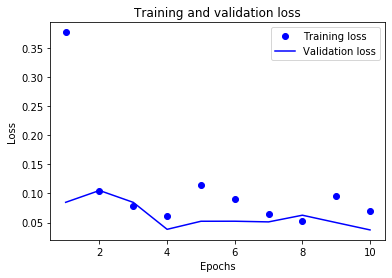

In [38]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')  # ‘bo’는 파란색 점을 의미합니다.
plt.plot(epochs, val_loss, 'b', label='Validation loss') # ‘b’는 파란색 실선을 의미합니다.
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [39]:
X_test = X_test.astype(float)
predict = model.predict(X_test)

In [44]:
import seaborn as sns

acc: 99.93%


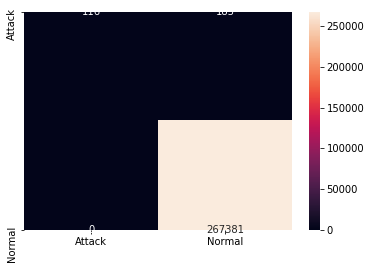

In [46]:
tp = 0
tn = 0
fp = 0
fn = 0
predictn = predict.flatten().round()
predictn = predictn.tolist()
Y_testn = Y_test.tolist()
for i in range(len(Y_testn)):
    if predictn[i] == 1 and Y_testn[i] == 1:
        tn += 1
    elif predictn[i] == 0 and Y_testn[i] == 0:
        tp += 1
    elif predictn[i] == 0 and Y_testn[i] == 1:
        fn += 1
    elif predictn[i] == 1 and Y_testn[i] == 0:
        fp += 1

to_heat_map = [[tn, fp], [fn, tp]]
to_heat_map = pd.DataFrame(to_heat_map, index=["Attack", "Normal"], columns=["Attack", "Normal"])
ax = sns.heatmap(to_heat_map, annot=True, fmt="d")

scores = model.evaluate(X_test, Y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))

In [47]:
print(tp, tn, fp, fn)

267381 116 185 0


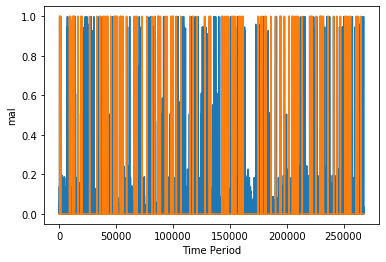

In [51]:
# Plot predictions
plt.plot(predict)
plt.plot(Y_test)
plt.xlabel("Time Period")
plt.ylabel("mal")
plt.show()